## Analysis of adversrial images

In [9]:
from keras.datasets import cifar10
from keras.utils import np_utils, generic_utils
from scipy.misc import imresize, imread, imshow
import skimage
import numpy as np
from skimage import io
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from utils import *
import scipy

In [27]:
model_id = 'keras_eg_alldrop'
work_dir = '/u/ambrish/models/'+model_id
selected_img_idx = 13
n_r = 2
n_c = 5

In [28]:
mc_acc = np.load(os.path.join(work_dir,'mc_acc_e.npy'))
std_acc = np.load(os.path.join(work_dir,'std_acc_e.npy'))
eps = np.load(os.path.join(work_dir,'e.npy'))
mean_e = np.load(os.path.join(work_dir,'mean_e.npy'))
mean_stddr_e = np.load(os.path.join(work_dir,'mean_stddr_e.npy'))
std_e = np.load(os.path.join(work_dir,'std_e.npy'))
var_ratio_e = np.load(os.path.join(work_dir,'var_ratio_e.npy'))
stoch_preds_e = np.load(os.path.join(work_dir,'stoch_preds_e.npy'))
#save_adv_e = np.load(os.path.join(work_dir,'save_adv_e.npy'))

 ### Adversrial images were generated for the CIFAR test set consisting of 10000 images using FastGradientSign
 ### FastGradSign - moving away
 ### Labels taken for lenet-alldrop with std-droput interprtation

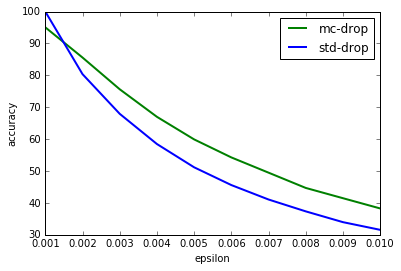

In [29]:
plt.plot(eps,100*mc_acc,color='g',linewidth=2, label='mc-drop')
plt.hold(True)
plt.plot(eps,100*std_acc,color='b',linewidth=2, label='std-drop')
plt.legend()
plt.xlabel('epsilon')
plt.ylabel('accuracy')

 - The following plot compares accruracy with respect to predctions from standard_droput model for different epsilons used in fgsm
 - As the label is taken from standard dropout model, the accuracy of mc_droput is lower
 - However, it is evident that the rate of change in accuracy is lower for mc_droput

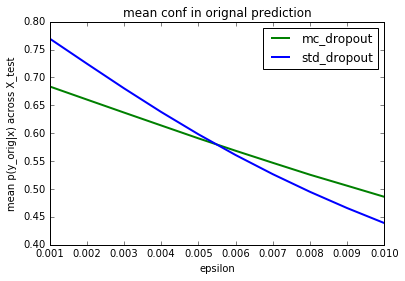

In [5]:
plt.plot(eps,mean_e,color='g',linewidth=2, label='mc_dropout')
plt.hold(True)
plt.plot(eps,mean_stddr_e,color='b',linewidth=2, label='std_dropout')
plt.legend()
plt.xlabel('epsilon')
plt.ylabel('mean p(y_orig|x) across X_test')
plt.title('mean conf in orignal prediction')

- p(y_orig|x_adv) was computed for adverarial images generated for the X_test
- Here the original label is taken from std_dropout model

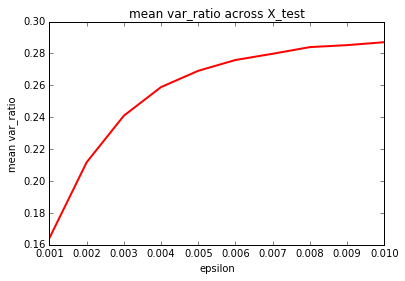

In [30]:
plt.plot(eps,var_ratio_e,color='r',linewidth=2)
plt.xlabel('epsilon')
plt.ylabel('mean var_ratio')
plt.title('mean var_ratio across X_test')

In [ ]:
plt.plot(eps,std_e,color='r',linewidth=2)
plt.xlabel('epsilon')
plt.ylabel('mean std')
plt.title('mean std across X_test')

### NOTE: Epsilon varies columnwise

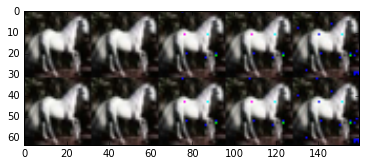

In [31]:
work_dir = '/u/ambrish/models/'
selected_img_idx = 13
save_adv_e = np.load(os.path.join(work_dir,'save_adv.npy'))

#grid specs rows, columns
n_r = 2 
n_c = 5 

m = save_adv_e
m = m[:,selected_img_idx,:,:,:]
m_ = np.concatenate(m,axis=0)

#for noise calculation
m_0 = np.concatenate([np.concatenate([m[0] for i in range(n_c)],axis=1) for j in range(n_r)], axis = 0)

#grid of adv images
m_ = np.concatenate(m,axis=0)
m_ = np.concatenate([m_[j*n_r*32:(j+1)*n_r*32,:,:] for j in range(n_c)], axis = 1)
plt.imshow(m_)

scipy.misc.imsave('adv_horse.jpg',m_)
plt.imsave('adv_horse.png',m_)

Adversrial image for a horse (epsilon from 0.0 to 0.01 with icrements of 0.001, columnwise)

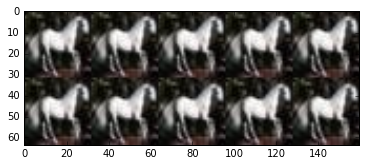

In [32]:
plt.imshow(scipy.ndimage.imread('adv_horse.jpg'))

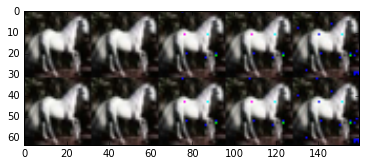

In [33]:
plt.imshow(scipy.ndimage.imread('adv_horse.png'))

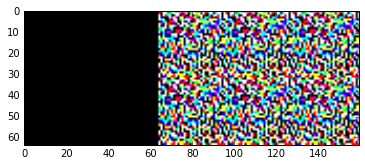

In [33]:
m_0 = np.concatenate([np.concatenate([m[0] for i in range(n_c)],axis=1) for j in range(n_r)], axis = 0)
plt.imshow(1.0*(m_-m_0))

The difference of adversrial image from the original image

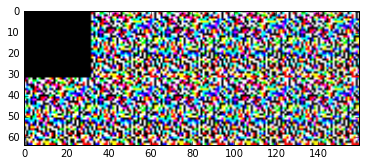

In [34]:
m_0 = np.concatenate([np.concatenate([m[0] for i in range(n_c)],axis=1) for j in range(n_r)], axis = 0)
plt.imshow(5.0*(m_-m_0))

The difference of adversrial image from the original image (**diffx5.0** is plotted for each pixel)